# Collocations - Exp 2 - 126003131 K Keshav

<strong>4 ways of identifying collocations</strong>
-    1. Frequency Based <br>
-    2. Mean and variance (freq and distance based) <br>
-    3. Hypothesis testing (t-test and chi squared) <br>
-    4. Mutual Information (not included here)

## Import Necessary Libraries and Datasets


In [53]:
import nltk
import pandas as pd
import numpy as np
from nltk.corpus import stopwords, reuters
from math import sqrt
from scipy.stats import t,chi2
import string
from nltk import bigrams,word_tokenize
from nltk.probability import FreqDist

In [54]:
nltk.download('reuters')
nltk.download('punkt')

[nltk_data] Downloading package reuters to
[nltk_data]     C:\Users\Admin\AppData\Roaming\nltk_data...
[nltk_data]   Package reuters is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Admin\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [17]:
def remove_punctuation(string):
    '''
        function to remove punctuations from string for cleaner text
    '''
    result=''.join(filter(lambda x:x.isalpha() or x.isspace(), string))
    return result

In [18]:
df = pd.read_csv('unstructured.csv')

In [23]:
tweets = []
for i in df['text']:
    tweets.append(remove_punctuation(str(i)).lstrip())

In [24]:
tweets[:5]

['AppleSupport causing the reply to be disregarded and the tapped notification under the keyboard is opened',
 'Your business means a lot to us Please DM your name zip code and additional details about your concern RR httpstcoznUuVJnr',
 'I really hope you all change but Im sure you wont Because you dont have to',
 'LiveChat is online at the moment  httpstcoSYVtUKq or contact    option    Leave a message to request a call back',
 'VirginTrains see attached error message Ive tried leaving a voicemail several times in the past week httpstcoNxVZjlYxk']

## 1. Frequency Based Approach

In [25]:
tokens=word_tokenize('.'.join(tweets).lower()) # combine the tweets and tokenize 

In [26]:
#generate bigrams
bigrams_list=list(bigrams(tokens))

#calculate frequency distribution for bigrams
bigram_freq = FreqDist(bigrams_list)

In [35]:
bigram_freq

FreqDist({('we', 'can'): 9, ('to', 'help'): 8, ('are', 'you'): 6, ('us', 'a'): 6, ('a', 'dm'): 6, ('please', 'dm'): 5, ('happy', 'to'): 5, ('so', 'we'): 5, ('look', 'into'): 5, ('into', 'this'): 5, ...})

In [36]:
target_bigram=("we","can")
frequency=bigram_freq[target_bigram]
frequency

9

## 2.a. Mean and Variance of Frequencies

In [39]:
frequencies=list(bigram_freq.values()) #get list of freq values

In [41]:
# calculate mean and variance
mean = np.mean(frequencies)
variance = np.var(frequencies)

In [42]:
mean, variance

(1.1705801104972375, 0.4204880612618663)

## 2.b. Mean and Variance of distances

In [44]:
def calculate_distance(sentence, word1, word2):
    tokens = nltk.word_tokenize(sentence.lower())
    try:
        index1=tokens.index(word1)
        index2=tokens.index(word2)
        return abs(index1-index2)
    except ValueError:
        return

In [46]:
distances=[]
for tweet in tweets:
    distance=calculate_distance(tweet,"happy","to")
    if distance is not None:
        distances.append(distance)

In [48]:
# compute mean distance and variance
mean_distance=np.mean(distances)
variance_distance=np.var(distances)
mean_distance,variance_distance

(3.4, 3.8400000000000007)

>Explanation of Results:<br>
 The mean distance between "knocked" and "door" is 3.5, meaning, on average, the
words "knocked" and "door" appear with a distance of 3.5 words apart  n the
sentence
 The variance of 0.25 indicates that the distances are relatively consistent with small
variation (some sentences have a distance of 3, other<br>s 4).

## Collocation and Distribution

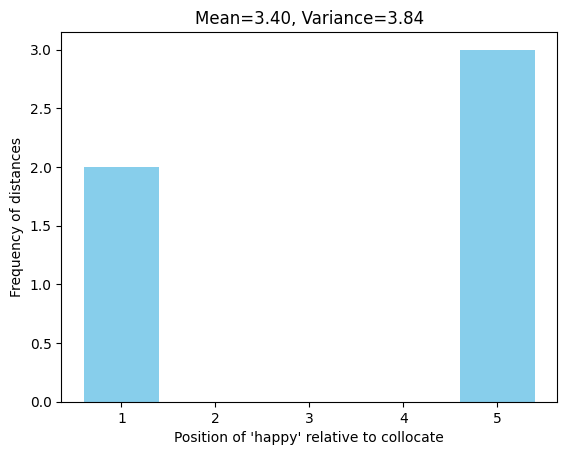

In [49]:
import matplotlib.pyplot as plt
from collections import Counter
distance_counts=Counter(distances)
plt.bar(distance_counts.keys(),distance_counts.values(),color='skyblue')
plt.xlabel("Position of 'happy' relative to collocate")
plt.ylabel("Frequency of distances")
plt.title(f"Mean={mean_distance:.2f}, Variance={variance_distance:.2f}")
plt.show()

> Variance is pretty high so even if frequency wise its the best, it isnt a strong collocation

## 3.a. Hypothesis Testing - Chi Squared Test

In [55]:
corpus = reuters.raw(categories='crude') #load the reuters corpus
tokens=nltk.word_tokenize(corpus.lower())
bigrams_list=list(bigrams(tokens))
bigrams_freq=Counter(bigrams_list)
word_freq=Counter(tokens)

In [56]:
N_tokens=len(tokens)
N_bigrams=len(bigrams_list)
bigram_to_test=('oil','prices')
observed_frequency=bigram_freq[bigram_to_test]

In [57]:
w1,w2=bigram_to_test
freq_w1=word_freq[w1]
freq_w2=word_freq[w2]

In [59]:
# Contingency Table Calculation
# Contingency table entries:
# O11: Observed frequency of (w1, w2)
# O12: Observed frequency of (w1, not w2)
# O21: Observed frequency of (not w1, w2)
# O22: Observed frequency of (not w1, not w2)

# Calc total no.of time w1 appears and w2 appears
O11=observed_frequency
O12=freq_w1 - O11 # w1 without w2
O21=freq_w2 - O11 # w2 without w1
O22=N_tokens - (O11+O12+O21) #remaining

In [60]:
# Expected frequency calculation under independence assumption
E11 = (freq_w1 * freq_w2) / N_tokens
E12 = (freq_w1 * (N_tokens - freq_w2)) / N_tokens
E21 = ((N_tokens - freq_w1) * freq_w2) / N_tokens
E22 = ((N_tokens - freq_w1) * (N_tokens - freq_w2)) / N_tokens

In [65]:
# Chi-square statistic calculation
chi_sq_stat = ((O11 - E11) ** 2 / E11) \
            + ((O12 - E12) ** 2 / E12) \
            + ((O21 - E21) ** 2 / E21) \
            + ((O22 - E22) ** 2 / E22) 

In [67]:
df=1 #set degrees of freedom

In [70]:
alpha = 0.05
chi_sq_critical=chi2.ppf(1-alpha,df)

In [71]:
# Output results
print(f"Bigram: {bigram_to_test}")
print(f"Observed Frequency (O11): {O11}")
print(f"Observed Frequency (O12): {O12}")
print(f"Observed Frequency (O21): {O21}")
print(f"Observed Frequency (O22): {O22}")
print(f"Expected Frequency (E11): {E11:.4f}")
print(f"Expected Frequency (E12): {E12:.4f}")
print(f"Expected Frequency (E21): {E21:.4f}")
print(f"Expected Frequency (E22): {E22:.4f}")
print(f"Chi-Square Statistic: {chi_sq_stat:.4f}")
print(f"Critical Value: {chi_sq_critical:.4f}")
print(f"Significance Level (α): {alpha}")

Bigram: ('oil', 'prices')
Observed Frequency (O11): 0
Observed Frequency (O12): 2214
Observed Frequency (O21): 578
Observed Frequency (O22): 130749
Expected Frequency (E11): 9.5828
Expected Frequency (E12): 2204.4172
Expected Frequency (E21): 568.4172
Expected Frequency (E22): 130758.5828
Chi-Square Statistic: 9.7867
Critical Value: 3.8415
Significance Level (α): 0.05


In [72]:
# Hypothesis Testing
if chi_sq_stat > chi_sq_critical:
    print("Result: Reject the null hypothesis. The bigram is likely a meaningful collocation.")
else:
    print("Result: Fail to reject the null hypothesis. The bigram is not a meaningful collocation.")

Result: Reject the null hypothesis. The bigram is likely a meaningful collocation.


## 3.b. Hypothesis Testing - t test

In [73]:
#compute expected frequency under independence
w1, w2 = bigram_to_test
P_w1=word_freq[w1]/N_tokens #P(w1)
P_w2=word_freq[w2]/N_tokens #P(w2)
expected_frequency=P_w1*P_w2*N_bigrams

#check if expected[frequency] is 0 or small
if expected_frequency<=0:
    print(f"Expected frequency is too small or zero for the bigram {bigram_to_test}.")
else:
    #calculate std
    std_dev=sqrt(expected_frequency)
    #compute the t-stat
    t_stat=(observed_frequency-expected_frequency)/std_dev

    #degrees of freedom
    df=N_bigrams-1

    alpha=0.05

    critical_value=t.ppf(1-(alpha/2),df)

    #determine if the null hypo is rejected
    if abs(t_stat)>critical_value:
        print(f"Reject the null hypothesis: The bigram {bigram_to_test} is a significant collocaion.")
    else:
        print(f"Fail to reject the null hypothesis: The bigram {bigram_to_test} ain't significant.")
    print(f"Observed Frequency: {observed_frequency}")
    print(f"Expected Frequency: {expected_frequency:.4f}")
    print(f"T-Statistic: {t_stat:.4f}")
    print(f"Critical Value (two-tailed): {critical_value:.4f}")

Reject the null hypothesis: The bigram ('oil', 'prices') is a significant collocaion.
Observed Frequency: 0
Expected Frequency: 9.5827
T-Statistic: -3.0956
Critical Value (two-tailed): 1.9600
